# Telecom Churn Case Study

### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. 
In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more 
important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

### Definitions of Churn:

**Revenue-based churn**: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. 
One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

**Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In this project, we will use the usage-based definition to define churn.

### High-value Churn

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). 
Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, we will define high-value customers based on a certain metric and predict churn only on high-value customers.

### Understanding the Business Objective and the Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. 
The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). 
In churn prediction, we assume that there are three phases of customer lifecycle :

**Good phase**: In this phase, the customer is happy with the service and behaves as usual.

**Action phase**: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. 
Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point(such as matching the competitor’s offer/improving the service quality etc.)

**Churn phase**: In this phase, the customer is said to have churned. We define churn based on this phase. 

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, 
the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### Step followed to solve problem
<ol>
<li> First understand data and find the high-value customers </li>
<li> Tag churners and remove attributes of the churn phase</li>
<li> Derive new features and converted existing into good, action phase</li>
<li> Worked on diffrent imbalance technique</li>
<li> Performed PCA</li>
<li> Build Multiple boosting model.</li>
<li> Build Logistic regression,SVM,decision tree and random forest model</li>
<li> Finally using random forest algorithm find important features</li>
<li> Recomendation</li>
</ol>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

In [2]:
# Reading the csv file and putting it into 'df' object.
telecom_df = pd.read_csv('telecom_churn_data.csv')

## Lets first understand the data.

In [3]:
#let's Check basic info of dataset
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
#Let's check column names
telecom_df.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

All columns name has suffix of respective month number except columns related to volume
('jun_vbc_3g', 'jul_vbc_3g','aug_vbc_3g').Lets rename it and change it in proper format


In [5]:
telecom_df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8',
                        'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [6]:
#let's check data in datset
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


After looking to data, the value of circle id and colmns related to last_date_of_month looks unique. It dosent look much informative better drop it

In [7]:
telecom_df = telecom_df.drop(['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

In [8]:
telecom_df.describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
count,9.999900e+04,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,6.660000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,32.330000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,115.595000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## Define high-value customers
Before calculating **average recharge amount** calculate the **total recharge data amount**

In [9]:
# Create new data frame(recharge_data_df) for total, max recharge data and avrage recharge amount data
recharge_data_df = telecom_df.columns[telecom_df.columns.str.contains('total_rech_data|max_rech_data|av_rech_amt_data')]
print(recharge_data_df)

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')


In [10]:
#from above newly created dataframe delete 9 month related columns as we have to calculate average recharge amount 
#only for first two monthe
recharge_data_df = recharge_data_df.drop(['total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9'])
print(recharge_data_df)

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')


In [11]:
#Checking Null Values for recharge related features
100*telecom_df[recharge_data_df].isnull().sum()/len(telecom_df)

total_rech_data_6     74.846748
total_rech_data_7     74.428744
total_rech_data_8     73.660737
max_rech_data_6       74.846748
max_rech_data_7       74.428744
max_rech_data_8       73.660737
av_rech_amt_data_6    74.846748
av_rech_amt_data_7    74.428744
av_rech_amt_data_8    73.660737
dtype: float64

In [12]:
# Replacing all Null values with 0
telecom_df[recharge_data_df] = telecom_df[recharge_data_df].replace(np.NaN,0)

In [13]:
# Recheck null for above colmn
100*telecom_df[recharge_data_df].isnull().sum()/len(telecom_df)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

In [14]:
# Derived New Feature for calculating amount spent in data recharge
telecom_df['total_rech_data_amt_6'] = telecom_df['av_rech_amt_data_6']*telecom_df['total_rech_data_6']
telecom_df['total_rech_data_amt_7'] = telecom_df['av_rech_amt_data_7']*telecom_df['total_rech_data_7']
telecom_df['total_rech_data_amt_8'] = telecom_df['av_rech_amt_data_8']*telecom_df['total_rech_data_8']

#deleting old features as new features will be used for the analysis
telecom_df.drop(['av_rech_amt_data_6','av_rech_amt_data_7'
                   ,'av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8'],
                axis=1,inplace=True)

As we have calculated total rechagre data amount and we already have total recharge  amount, Lets calculate avrage of total recharge amount

In [15]:
#Average Recharge amount for 6th and 7th month
telecom_df['av_rech_amt'] = (telecom_df['total_rech_amt_6'] + telecom_df['total_rech_data_amt_6'] + telecom_df['total_rech_data_amt_7'] + telecom_df['total_rech_amt_7'])/4


In [16]:
# Creating a dataframe containing highe value customer. 
#Those who have recharged with an amount more than or equal to X, where 
#X is the 70th percentile of the average recharge amount in the first two months (the good phase).
high_value_customers = telecom_df['av_rech_amt'] >= telecom_df['av_rech_amt'].quantile(0.7)
telecom_df = telecom_df[high_value_customers]
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 220 entries, mobile_number to av_rech_amt
dtypes: float64(177), int64(34), object(9)
memory usage: 50.6+ MB


In [17]:
# Creating Churn Customer
telecom_df['Churn']= np.where((telecom_df['total_ic_mou_9']==0)&(telecom_df['total_og_mou_9']==0)&(telecom_df['vol_2g_mb_9']==0)&(telecom_df['vol_3g_mb_9']==0),1,0)
print(telecom_df['Churn'].value_counts())

0    27560
1     2441
Name: Churn, dtype: int64


In [18]:
#Drop All the columns related to 9th Month
telecom_df=telecom_df.drop(telecom_df.filter(regex="_9",axis=1).columns,axis=1)
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 166 entries, mobile_number to Churn
dtypes: float64(133), int32(1), int64(26), object(6)
memory usage: 38.1+ MB


In [19]:
#Churn Rate
P=telecom_df['Churn'].value_counts()
Rate=P[0]/(P[1]+P[0])
print("Churn Rate={:.2f}".format(100*Rate))

Churn Rate=91.86


## Exploratory analysis and Feature engineering

In [20]:
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# do an inline so that plt.show() is not required everytime
%matplotlib inline

In [21]:
## Create function to check relation between various parameters and churn
def draw_boxplot(june, july, august):
    plt.rcParams["figure.figsize"] = [15, 5]
    fig = plt.figure()        
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=telecom_df, y=june, x="Churn",
                hue="Churn", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=telecom_df, y=july,  x="Churn",
                hue="Churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=telecom_df, y=august,  x="Churn",
                hue="Churn", linewidth=2.5, showfliers=False, ax=axes[2])

**Mainly we have divided data in to below parts so it will be easy for doing anlysis**
<ol>
  <li>Date related features</li>
  <li>Rechagre related features</li>
  <li>Internet related features</li>
  <li>Average revenue related features</li>
  <li>Minute of usage related features</li>
  <li>Outgoing other and Incoming other</li>
</ol>

### Date related features

In [22]:
#Converted date columns in mmddyyyy format
telecom_df['date_of_last_rech_6'] = pd.to_datetime(telecom_df.date_of_last_rech_6, format='%m/%d/%Y')
telecom_df['date_of_last_rech_7'] = pd.to_datetime(telecom_df.date_of_last_rech_7, format='%m/%d/%Y')
telecom_df['date_of_last_rech_8'] = pd.to_datetime(telecom_df.date_of_last_rech_8, format='%m/%d/%Y')
telecom_df['date_of_last_rech_data_6'] = pd.to_datetime(telecom_df.date_of_last_rech_data_6, format='%m/%d/%Y')
telecom_df['date_of_last_rech_data_7'] = pd.to_datetime(telecom_df.date_of_last_rech_data_7, format='%m/%d/%Y')
telecom_df['date_of_last_rech_data_8'] = pd.to_datetime(telecom_df.date_of_last_rech_data_8, format='%m/%d/%Y')

#Derived new columns day of last recharge from  date of last rech
telecom_df['day_of_last_rech_6'] =  telecom_df['date_of_last_rech_6'].dt.day
telecom_df['day_of_last_rech_7'] = telecom_df['date_of_last_rech_7'].dt.day
telecom_df['day_of_last_rech_8'] =  telecom_df['date_of_last_rech_8'].dt.day
telecom_df['day_of_last_rech_data_6'] =  telecom_df['date_of_last_rech_data_6'].dt.day
telecom_df['day_of_last_rech_data_7'] = telecom_df['date_of_last_rech_data_7'].dt.day
telecom_df['day_of_last_rech_data_8'] =  telecom_df['date_of_last_rech_data_8'].dt.day

#delete orignal columns
telecom_df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

### Rechagre related features

In [23]:
#filter recharge related features
recharge_df =  telecom_df.columns[telecom_df.columns.str.contains('max_rech_amt|max_rech_data|last_day_rch_amt|total_rech_amt|total_rech_data_amt|total_rech_num')]
recharge_df

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8'],
      dtype='object')

In [24]:
#check null value % for above columns
100*telecom_df[recharge_df].isnull().sum()/len(telecom_df)

total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
last_day_rch_amt_6       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_8       0.0
max_rech_data_6          0.0
max_rech_data_7          0.0
max_rech_data_8          0.0
total_rech_data_amt_6    0.0
total_rech_data_amt_7    0.0
total_rech_data_amt_8    0.0
dtype: float64

**Check relation between recharge related features and chrun customer**

<Figure size 1080x360 with 0 Axes>

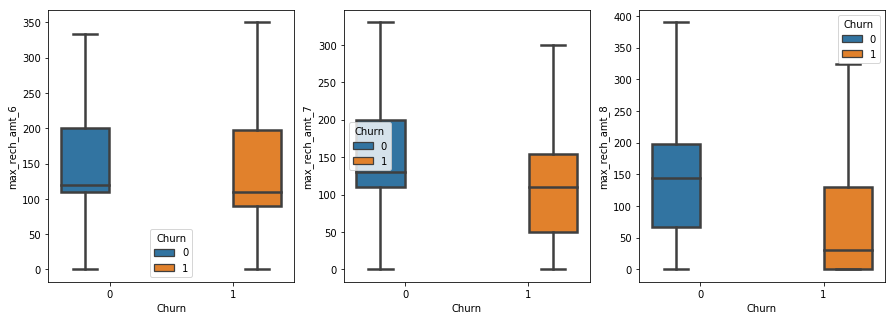

In [25]:
draw_boxplot('max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8')

There is significant change in Max recharge amount for churn customer in August month.

<Figure size 1080x360 with 0 Axes>

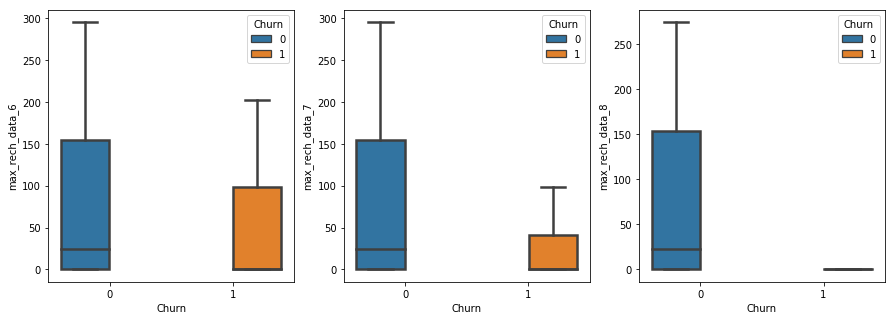

In [26]:
draw_boxplot('max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8')

There is significant change in Max recharge data for churn customer in August month.

<Figure size 1080x360 with 0 Axes>

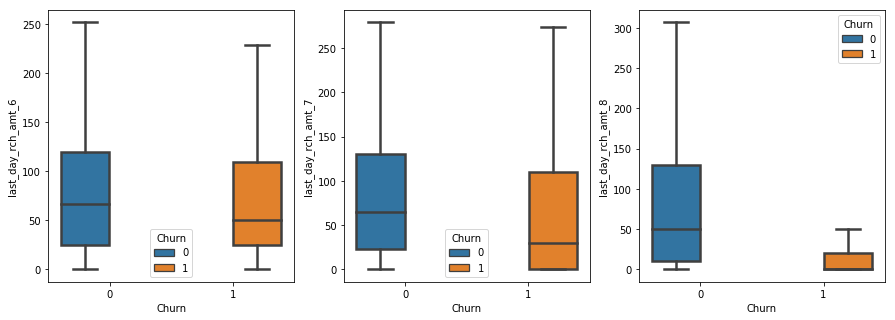

In [27]:
draw_boxplot('last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8')

There is significant change in Last day recharge amount for churn customer in August month.

<Figure size 1080x360 with 0 Axes>

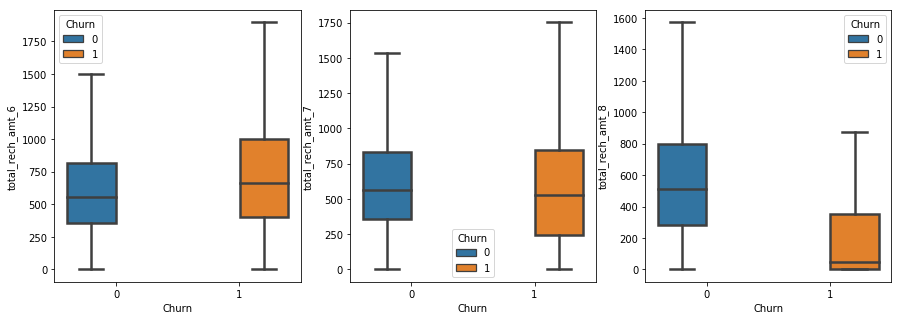

In [28]:
draw_boxplot('total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8')

There is significant change in Total recharge amount for churn customer in August month.

<Figure size 1080x360 with 0 Axes>

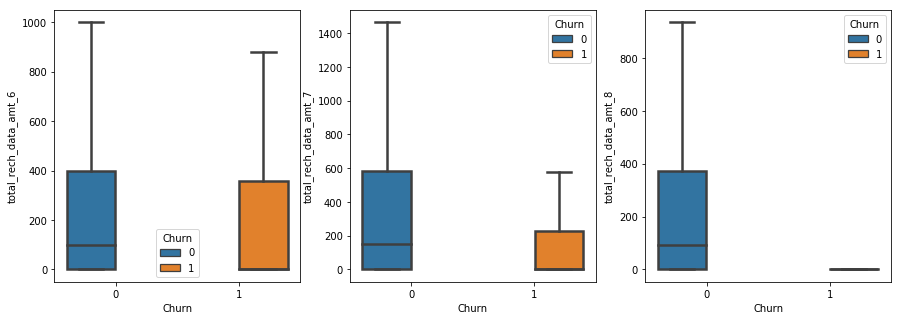

In [29]:
draw_boxplot('total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_data_amt_8')

There is significant change in Total recharge amount for churn customer in August month.

<Figure size 1080x360 with 0 Axes>

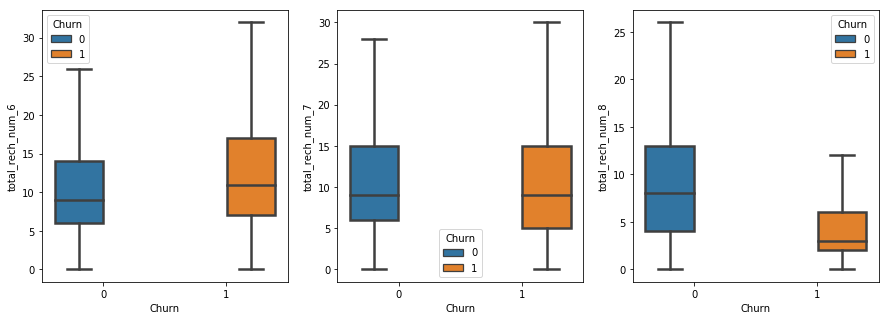

In [30]:
draw_boxplot('total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8')

There is significant change in total recharge number for churn customer in August month.

In [31]:
#define good phase for recharge related data
telecom_df['goodPhase_max_rech_amt'] = (telecom_df['max_rech_amt_6'] + telecom_df['max_rech_amt_7'])/2
telecom_df['goodPhase_max_rech_data'] = (telecom_df['max_rech_data_6'] + telecom_df['max_rech_data_7'])/2
telecom_df['goodPhase_last_day_rch_amt'] = (telecom_df['last_day_rch_amt_6'] + telecom_df['last_day_rch_amt_7'])/2 
telecom_df['goodPhase_total_rech_amt'] = (telecom_df['total_rech_amt_6']+ telecom_df['total_rech_amt_7'])/2
telecom_df['goodPhase_total_rech_data_amt'] = (telecom_df['total_rech_data_amt_6'] + telecom_df['total_rech_data_amt_7'])/2
telecom_df['goodPhase_total_rech_num'] = (telecom_df['total_rech_num_6'] + telecom_df['total_rech_num_7'])/2

#Rename suffix _8 as Action Phase 
telecom_df.rename(columns={"max_rech_amt_8": "actionPhase_max_rech_amt", "max_rech_data_8": "actionPhase_max_rech_data"
                           ,"last_day_rch_amt_8":"actionPhase_last_day_rch_amt","total_rech_amt_8":"actionPhase_total_rech_amt",
                           "total_rech_data_amt_8":"actionPhase_total_rech_data_amt","total_rech_num_8":"actionPhase_total_rech_num"},
                  inplace=True)

In [32]:
#As we derive new columns lets selete the original columns
telecom_df.drop(['max_rech_amt_6','max_rech_amt_7','max_rech_data_6','max_rech_data_7'
                   ,'last_day_rch_amt_6','last_day_rch_amt_7','total_rech_amt_6','total_rech_amt_7'
                  ,'total_rech_data_amt_6','total_rech_data_amt_7','total_rech_num_6','total_rech_num_7'],axis=1,inplace=True)

### Internet usage related variables                                      

In [33]:
#filter the internet speed related features 
Internet_df =  telecom_df.columns[telecom_df.columns.str.contains('2g|3g')]
Internet_df

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'],
      dtype='object')

In [34]:
#check null for above columns
100*telecom_df[Internet_df].isnull().sum()/len(telecom_df)

count_rech_2g_6    44.148528
count_rech_2g_7    43.145228
count_rech_2g_8    46.825106
count_rech_3g_6    44.148528
count_rech_3g_7    43.145228
count_rech_3g_8    46.825106
vol_2g_mb_6         0.000000
vol_2g_mb_7         0.000000
vol_2g_mb_8         0.000000
vol_3g_mb_6         0.000000
vol_3g_mb_7         0.000000
vol_3g_mb_8         0.000000
arpu_3g_6          44.148528
arpu_3g_7          43.145228
arpu_3g_8          46.825106
arpu_2g_6          44.148528
arpu_2g_7          43.145228
arpu_2g_8          46.825106
monthly_2g_6        0.000000
monthly_2g_7        0.000000
monthly_2g_8        0.000000
sachet_2g_6         0.000000
sachet_2g_7         0.000000
sachet_2g_8         0.000000
monthly_3g_6        0.000000
monthly_3g_7        0.000000
monthly_3g_8        0.000000
sachet_3g_6         0.000000
sachet_3g_7         0.000000
sachet_3g_8         0.000000
vbc_3g_8            0.000000
vbc_3g_7            0.000000
vbc_3g_6            0.000000
dtype: float64

In [35]:
#Around 45% data is not present for count and avrage revenue per user related columnsso better drop it.
telecom_df = telecom_df.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1)

**Check relation between internet related features and churn customer**

In [36]:
# Derive good phase for volume of 2G and 3G usage columns
telecom_df['goodPhase_vol_2g_mb'] = (telecom_df['vol_2g_mb_6'] + telecom_df['vol_2g_mb_7'])/2
telecom_df['goodPhase_vol_3g_mb'] = (telecom_df['vol_3g_mb_6'] + telecom_df['vol_3g_mb_7'])/2

#Action Phase 
telecom_df.rename(columns={"vol_2g_mb_8": "actionPhase_vol_2g_mb", "vol_3g_mb_8": "actionPhase_3g_mb"},inplace=True)

# drop the original columns 
telecom_df = telecom_df.drop(['vol_2g_mb_6','vol_2g_mb_7'
              ,'vol_3g_mb_6','vol_3g_mb_7'],axis=1)

In [37]:
# Define good phase for monthly 2G/3G service schemes columns
telecom_df['goodPhase_monthly_2g'] = (telecom_df['monthly_2g_6'] + telecom_df['monthly_2g_7'])/2
telecom_df['goodPhase_monthly_3g'] = (telecom_df['monthly_3g_6'] + telecom_df['monthly_3g_7'])/2

#Action Phase 
telecom_df.rename(columns={"monthly_2g_8": "actionPhase_monthly_2g", "monthly_3g_8": "actionPhase_monthly_3g"},inplace=True)


# drop the original columns 
telecom_df = telecom_df.drop(['monthly_2g_6','monthly_2g_7'
              ,'monthly_3g_6','monthly_3g_7'],axis=1)

Check relation between volum base cost and churn customer

<Figure size 1080x360 with 0 Axes>

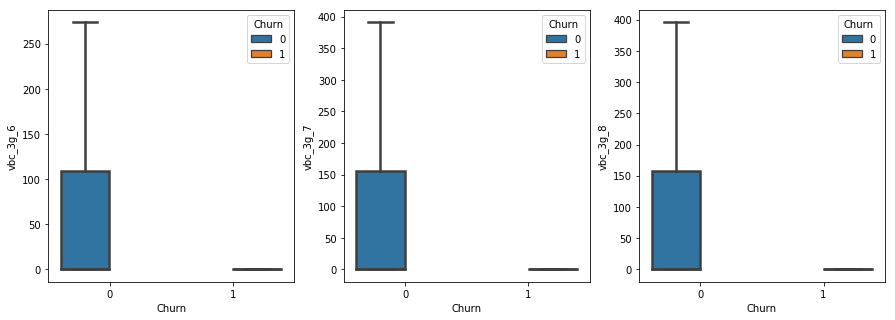

In [38]:
draw_boxplot('vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8')

In [39]:
#Define good phase volum base cost 3G service schemes columns
telecom_df['goodPhase_vbc_3g'] = (telecom_df['vbc_3g_6'] + telecom_df['vbc_3g_7'])/2

#Action Phase 
telecom_df.rename(columns={"vbc_3g_8": "actionPhase_vbc_3g"},inplace=True)

#Drop old columns 
telecom_df = telecom_df.drop(['vbc_3g_6','vbc_3g_7'],axis=1)

<Figure size 1080x360 with 0 Axes>

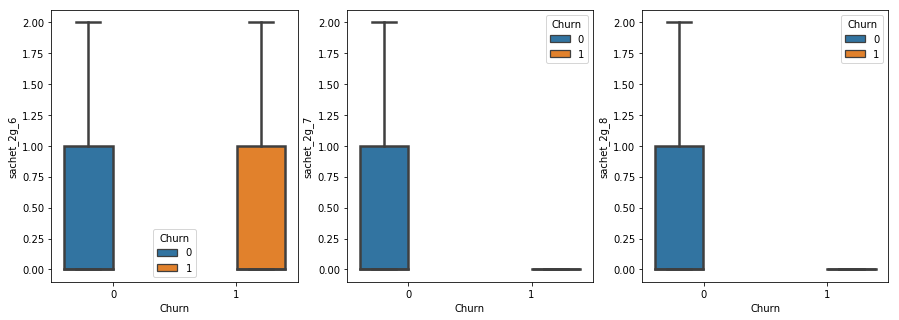

In [40]:
draw_boxplot('sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8')

we can see the change for chrun customer in july and August month

In [41]:
# Define good phase for sachet 
telecom_df['goodPhase_sachet_2g'] = (telecom_df['sachet_2g_6'] + telecom_df['sachet_2g_7'])/2
telecom_df['goodPhase_sachet_3g'] = (telecom_df['sachet_3g_6'] + telecom_df['sachet_3g_7'])/2

#Action Phase 
telecom_df.rename(columns={"sachet_2g_8": "actionPhase_sachet_2g", "sachet_3g_8": "actionPhase_sachet_3g"},inplace=True)

# drop the original columns 
telecom_df = telecom_df.drop(['sachet_2g_6','sachet_2g_7'
              ,'sachet_3g_6','sachet_3g_7'],axis=1)

## average revenue

In [42]:
#filter average revenue related features
arpu_df = telecom_df.columns[telecom_df.columns.str.contains('arpu')]
print(arpu_df)

Index(['arpu_6', 'arpu_7', 'arpu_8'], dtype='object')


**Lets check the relationship between avrage revenu related features and churn customer**

<Figure size 1080x360 with 0 Axes>

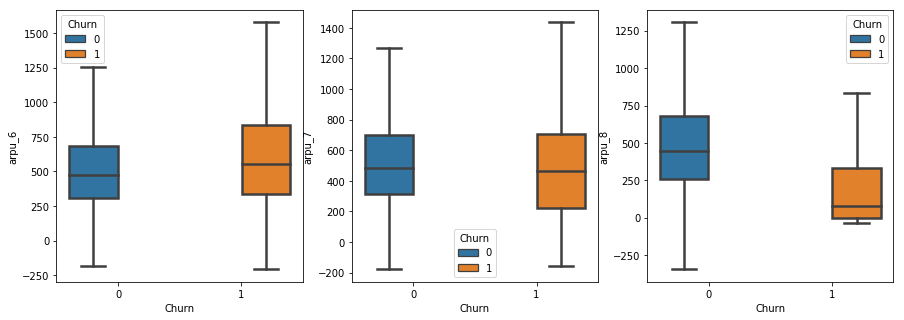

In [43]:
draw_boxplot('arpu_6', 'arpu_7', 'arpu_8')

We can see the diffrence of avrage revenu in August month for churn customer

In [44]:
# Define good phase for avrage revenu
telecom_df['goodPhase_arpu'] = (telecom_df['arpu_6'] + telecom_df['arpu_7'])/2

#Action Phase 
telecom_df.rename(columns={"arpu_8": "actionPhase_arpu"},inplace=True)

# drop the original columns 
telecom_df = telecom_df.drop(['arpu_6','arpu_7'],axis=1)

## minutes of usage

In [45]:
#filter minute of usage related featres from telecom dataset
mou_df = telecom_df.columns[telecom_df.columns.str.contains('mou')]
mou_df

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

In [46]:
100*telecom_df[mou_df].isnull().sum()/len(telecom_df)

loc_og_t2o_mou      0.746642
std_og_t2o_mou      0.746642
loc_ic_t2o_mou      0.746642
onnet_mou_6         1.816606
onnet_mou_7         1.789940
onnet_mou_8         3.913203
offnet_mou_6        1.816606
offnet_mou_7        1.789940
offnet_mou_8        3.913203
roam_ic_mou_6       1.816606
roam_ic_mou_7       1.789940
roam_ic_mou_8       3.913203
roam_og_mou_6       1.816606
roam_og_mou_7       1.789940
roam_og_mou_8       3.913203
loc_og_t2t_mou_6    1.816606
loc_og_t2t_mou_7    1.789940
loc_og_t2t_mou_8    3.913203
loc_og_t2m_mou_6    1.816606
loc_og_t2m_mou_7    1.789940
loc_og_t2m_mou_8    3.913203
loc_og_t2f_mou_6    1.816606
loc_og_t2f_mou_7    1.789940
loc_og_t2f_mou_8    3.913203
loc_og_t2c_mou_6    1.816606
loc_og_t2c_mou_7    1.789940
loc_og_t2c_mou_8    3.913203
loc_og_mou_6        1.816606
loc_og_mou_7        1.789940
loc_og_mou_8        3.913203
                      ...   
loc_ic_t2f_mou_6    1.816606
loc_ic_t2f_mou_7    1.789940
loc_ic_t2f_mou_8    3.913203
loc_ic_mou_6  

In [47]:
#Check null value for above column
telecom_df[mou_df] = telecom_df[mou_df].replace(np.NaN,0)
100*telecom_df[mou_df].isnull().sum()/len(telecom_df)

loc_og_t2o_mou      0.0
std_og_t2o_mou      0.0
loc_ic_t2o_mou      0.0
onnet_mou_6         0.0
onnet_mou_7         0.0
onnet_mou_8         0.0
offnet_mou_6        0.0
offnet_mou_7        0.0
offnet_mou_8        0.0
roam_ic_mou_6       0.0
roam_ic_mou_7       0.0
roam_ic_mou_8       0.0
roam_og_mou_6       0.0
roam_og_mou_7       0.0
roam_og_mou_8       0.0
loc_og_t2t_mou_6    0.0
loc_og_t2t_mou_7    0.0
loc_og_t2t_mou_8    0.0
loc_og_t2m_mou_6    0.0
loc_og_t2m_mou_7    0.0
loc_og_t2m_mou_8    0.0
loc_og_t2f_mou_6    0.0
loc_og_t2f_mou_7    0.0
loc_og_t2f_mou_8    0.0
loc_og_t2c_mou_6    0.0
loc_og_t2c_mou_7    0.0
loc_og_t2c_mou_8    0.0
loc_og_mou_6        0.0
loc_og_mou_7        0.0
loc_og_mou_8        0.0
                   ... 
loc_ic_t2f_mou_6    0.0
loc_ic_t2f_mou_7    0.0
loc_ic_t2f_mou_8    0.0
loc_ic_mou_6        0.0
loc_ic_mou_7        0.0
loc_ic_mou_8        0.0
std_ic_t2t_mou_6    0.0
std_ic_t2t_mou_7    0.0
std_ic_t2t_mou_8    0.0
std_ic_t2m_mou_6    0.0
std_ic_t2m_mou_7

**Lets check the relationship between minute if usage related features and churn customer**

<Figure size 1080x360 with 0 Axes>

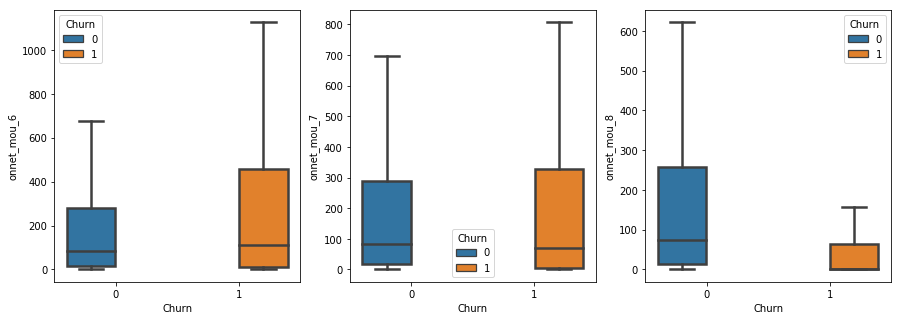

In [48]:
draw_boxplot('onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8')

We can see the diffrence in august month for chrun customer

<Figure size 1080x360 with 0 Axes>

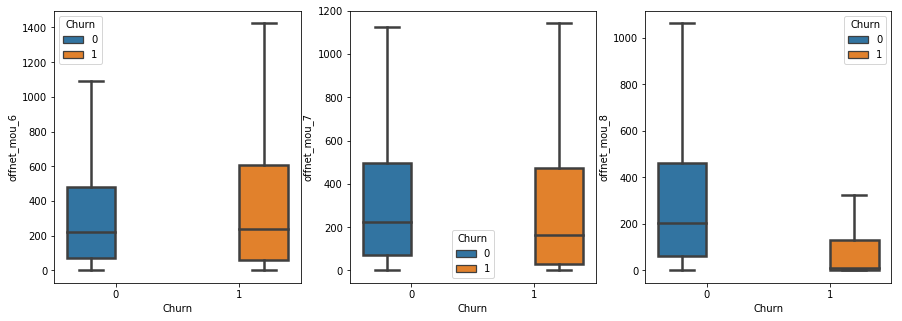

In [49]:
draw_boxplot('offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8')

We can see the diffrence in august month for chrun customer

In [50]:
# Define good phase
telecom_df['goodPhase_onnet_mou'] = (telecom_df['onnet_mou_6'] + telecom_df['onnet_mou_7'])/2
telecom_df['goodPhase_offnet_mou'] = (telecom_df['offnet_mou_6'] + telecom_df['offnet_mou_7'])/2

#Action phase
telecom_df.rename(columns={"onnet_mou_8": "actionPhase_onnet_mou","offnet_mou_8": "actionPhase_offnet_mou"},inplace=True)

# drop the original columns 
telecom_df = telecom_df.drop(['onnet_mou_6','onnet_mou_7'
              ,'offnet_mou_6','offnet_mou_7'],axis=1)

In [51]:
#Define good phase for all other features related to minute of usage
telecom_df['goodPhase_roam_ic_mou'] = (telecom_df['roam_ic_mou_6'] + telecom_df['roam_ic_mou_7'])/2
telecom_df['goodPhase_roam_og_mou'] = (telecom_df['roam_og_mou_6'] + telecom_df['roam_og_mou_7'])/2
telecom_df['goodPhase_loc_og_t2t_mou'] = (telecom_df['loc_og_t2t_mou_6'] + telecom_df['loc_og_t2t_mou_7'])/2
telecom_df['goodPhase_loc_og_t2m_mou'] = (telecom_df['loc_og_t2m_mou_6'] + telecom_df['loc_og_t2m_mou_7'])/2
telecom_df['goodPhase_loc_og_t2f_mou'] = (telecom_df['loc_og_t2f_mou_6'] + telecom_df['loc_og_t2f_mou_7'])/2
telecom_df['goodPhase_loc_og_t2c_mou'] = (telecom_df['loc_og_t2c_mou_6'] + telecom_df['loc_og_t2c_mou_7'])/2
telecom_df['goodPhase_loc_og_mou'] = (telecom_df['loc_og_mou_6'] + telecom_df['loc_og_mou_7'])/2
telecom_df['goodPhase_std_og_t2t_mou'] = (telecom_df['std_og_t2t_mou_6'] + telecom_df['std_og_t2t_mou_7'])/2
telecom_df['goodPhase_std_og_t2m_mou'] = (telecom_df['std_og_t2m_mou_6'] + telecom_df['std_og_t2m_mou_7'])/2
telecom_df['goodPhase_std_og_t2f_mou'] = (telecom_df['std_og_t2f_mou_6'] + telecom_df['std_og_t2f_mou_7'])/2
telecom_df['goodPhase_std_og_t2c_mou'] = (telecom_df['std_og_t2c_mou_6'] + telecom_df['std_og_t2c_mou_7'])/2
telecom_df['goodPhase_std_og_mou'] = (telecom_df['std_og_mou_6'] + telecom_df['std_og_mou_7'])/2
telecom_df['goodPhase_isd_og_mou'] = (telecom_df['isd_og_mou_6'] + telecom_df['isd_og_mou_7'])/2
telecom_df['goodPhase_spl_og_mou'] = (telecom_df['spl_og_mou_6'] + telecom_df['spl_og_mou_7'])/2
telecom_df['goodPhase_total_og_mou'] = (telecom_df['total_og_mou_6'] + telecom_df['total_og_mou_7'])/2
telecom_df['goodPhase_loc_ic_t2t_mou'] = (telecom_df['loc_ic_t2t_mou_6'] + telecom_df['loc_ic_t2t_mou_7'])/2
telecom_df['goodPhase_loc_ic_t2m_mou'] = (telecom_df['loc_ic_t2m_mou_6'] + telecom_df['loc_ic_t2m_mou_7'])/2
telecom_df['goodPhase_loc_ic_t2f_mou'] = (telecom_df['loc_ic_t2f_mou_6'] + telecom_df['loc_ic_t2f_mou_7'])/2
telecom_df['goodPhase_loc_ic_mou'] = (telecom_df['loc_ic_mou_6'] + telecom_df['loc_ic_mou_7'])/2
telecom_df['goodPhase_std_ic_t2t_mou'] = (telecom_df['std_ic_t2t_mou_6'] + telecom_df['std_ic_t2t_mou_7'])/2
telecom_df['goodPhase_std_ic_t2m_mou'] = (telecom_df['std_ic_t2m_mou_6'] + telecom_df['std_ic_t2m_mou_7'])/2
telecom_df['goodPhase_std_ic_t2f_mou'] = (telecom_df['std_ic_t2f_mou_6'] + telecom_df['std_ic_t2f_mou_7'])/2
telecom_df['goodPhase_std_ic_t2o_mou'] = (telecom_df['std_ic_t2o_mou_6'] + telecom_df['std_ic_t2o_mou_7'])/2
telecom_df['goodPhase_std_ic_mou'] = (telecom_df['std_ic_mou_6'] + telecom_df['std_ic_mou_7'])/2
telecom_df['goodPhase_total_ic_mou'] = (telecom_df['total_ic_mou_6'] + telecom_df['total_ic_mou_7'])/2
telecom_df['goodPhase_spl_ic_mou'] = (telecom_df['spl_ic_mou_6'] + telecom_df['spl_ic_mou_7'])/2
telecom_df['goodPhase_isd_ic_mou'] = (telecom_df['isd_ic_mou_6'] + telecom_df['isd_ic_mou_7'])/2

In [52]:
#Define Action phase
telecom_df.rename(columns={"roam_ic_mou_8": "actionPhase_roam_ic_mou","roam_og_mou_8": "actionPhase_roam_og_mou",
                          "loc_og_t2t_mou_8": "actionPhase_loc_og_t2t_mou","loc_og_t2m_mou_8": "actionPhase_loc_og_t2m_mou",
                          "loc_og_t2f_mou_8": "actionPhase_loc_og_t2f_mou","loc_og_t2c_mou_8": "actionPhase_loc_og_t2c_mou",
                          "loc_og_mou_8": "actionPhase_loc_og_mou","std_og_t2t_mou_8": "actionPhase_std_og_t2t_mou",
                          "std_og_t2m_mou_8": "actionPhase_std_og_t2m_mou","std_og_t2f_mou_8": "actionPhase_std_og_t2f_mou",
                          "std_og_t2c_mou_8": "actionPhase_std_og_t2c_mou","std_og_mou_8": "actionPhase_std_og_mou",
                          "isd_og_mou_8": "actionPhase_isd_og_mou","spl_og_mou_8": "actionPhase_spl_og_mou",
                          "total_og_mou_8": "actionPhase_total_og_mou","loc_ic_t2t_mou_8": "actionPhase_loc_ic_t2t_mou",
                          "loc_ic_t2m_mou_8": "actionPhase_loc_ic_t2m_mou","loc_ic_t2f_mou_8": "actionPhase_loc_ic_t2f_mou",
                          "loc_ic_mou_8": "actionPhase_loc_ic_mou","std_ic_t2t_mou_8": "actionPhase_std_ic_t2t_mou",
                          "std_ic_t2m_mou_8": "actionPhase_std_ic_t2m_mou","std_ic_t2f_mou_8": "actionPhase_std_ic_t2f_mou",
                          "std_ic_t2o_mou_8": "actionPhase_std_ic_t2o_mou","std_ic_mou_8": "actionPhase_std_ic_mou",
                          "total_ic_mou_8": "actionPhase_total_ic_mou","spl_ic_mou_8": "actionPhase_spl_ic_mou",
                          "isd_ic_mou_8": "actionPhase_isd_ic_mou"},inplace=True)

In [53]:
#Drop old columns
telecom_df = telecom_df.drop(['roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6',
       'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6',
       'isd_ic_mou_6','roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7'],axis=1)

## Outgoing other and Incoming other

In [54]:
#define good phase for outgoing/Incoming other
telecom_df['goodPhase_og_others'] = (telecom_df['og_others_6'] + telecom_df['og_others_7'])/2
telecom_df['goodPhase_ic_others'] = (telecom_df['ic_others_6'] + telecom_df['ic_others_7'])/2

#Action phase
telecom_df.rename(columns={"og_others_8": "actionPhase_og_others","ic_others_8": "actionPhase_ic_others"},inplace=True)

# drop the original columns 
telecom_df = telecom_df.drop(['og_others_6','og_others_7'
              ,'ic_others_6','ic_others_7'],axis=1)

Check columns which has more than 40% NA values.

In [55]:
telecom_df_null = telecom_df.isnull().sum() / len(telecom_df)
missing_features = telecom_df_null[telecom_df_null > 0.40].index

#Dropt columns having 40% NA values.
telecom_df.drop(missing_features, axis=1, inplace=True)

In [56]:
#Check themissing values and drop related columns 
telecom_df_null = telecom_df.isnull().sum() / len(telecom_df)
missing_features = telecom_df_null[telecom_df_null > 0.0].index
print(missing_features)

Index(['actionPhase_og_others', 'actionPhase_ic_others', 'day_of_last_rech_6',
       'day_of_last_rech_7', 'day_of_last_rech_8', 'goodPhase_og_others',
       'goodPhase_ic_others'],
      dtype='object')


In [57]:
#Confirm there is no NA and missing data in dataframe
telecom_df[missing_features] = telecom_df[missing_features].replace(np.NaN,0)
telecom_df_null = telecom_df.isnull().sum() / len(telecom_df)
missing_features = telecom_df_null[telecom_df_null > 0.0].index
print(missing_features)

Index([], dtype='object')


## Build  Models

In [58]:
#import libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [59]:
# Putting feature variable to X
X = telecom_df.drop(['Churn','mobile_number'],axis=1)

X.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,actionPhase_arpu,actionPhase_onnet_mou,actionPhase_offnet_mou,actionPhase_roam_ic_mou,actionPhase_roam_og_mou,actionPhase_loc_og_t2t_mou,actionPhase_loc_og_t2m_mou,...,goodPhase_std_ic_t2t_mou,goodPhase_std_ic_t2m_mou,goodPhase_std_ic_t2f_mou,goodPhase_std_ic_t2o_mou,goodPhase_std_ic_mou,goodPhase_total_ic_mou,goodPhase_spl_ic_mou,goodPhase_isd_ic_mou,goodPhase_og_others,goodPhase_ic_others
0,0.0,0.0,0.0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000
7,0.0,0.0,0.0,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,...,24.360,109.215,43.215,0.0,176.810,592.250,0.105,8.295,0.0,15.465
8,0.0,0.0,0.0,137.362,35.08,136.48,0.00,0.00,12.49,50.54,...,0.290,13.255,0.000,0.0,13.545,66.175,0.000,0.000,0.0,0.000
21,0.0,0.0,0.0,637.760,85.14,983.39,0.00,0.00,23.34,104.81,...,10.020,52.960,0.000,0.0,62.985,169.490,0.000,0.000,0.0,0.000
23,0.0,0.0,0.0,366.966,33.58,205.89,0.00,0.00,33.58,148.56,...,0.255,8.660,0.000,0.0,8.915,171.235,0.000,14.115,0.0,2.675


In [60]:
# Putting response variable to y
y = telecom_df['Churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int32

In [61]:
#feature standardisation
cols = X.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X, columns=cols)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=100)

In [62]:
#Build logistic regression
logr = LogisticRegression()
logr.fit(X_train,y_train)

C:\Users\Aniket-PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aniket-PC\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
#predict result
y_pred = logr.predict(X_test)

In [64]:
#Check confusion metrix
confusion = metrics.confusion_matrix(y_test,y_pred )
print(confusion)

[[8148  103]
 [ 531  219]]


In [65]:
# Model Evaluation
sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
specificity =  confusion[0,0]/(confusion[0,1]+confusion[0,0])
print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

Accuracy : 0.9295633818464615
Sensitivity:  0.292
Specificity:  0.9875166646467095


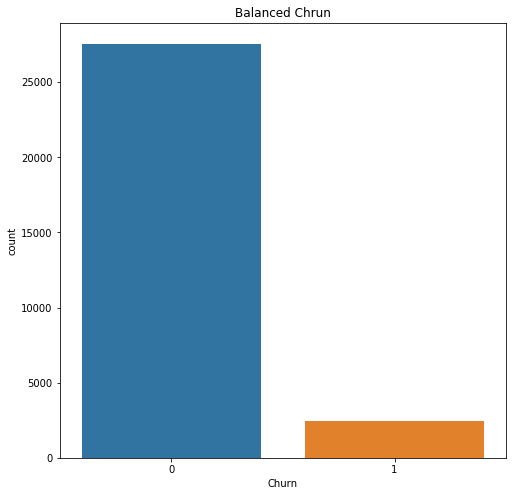

In [66]:
#plot chrun and non chrun values
plt.figure(figsize=(8, 8))
sns.countplot('Churn', data=telecom_df)
plt.title('Balanced Chrun')
plt.show()

In [67]:
print('The number of Non-Churners are: ' + str(telecom_df['Churn'].value_counts()[0]) + ' which is ', round(telecom_df['Churn'].value_counts()[0]/len(telecom_df) * 100,2), '% of the dataset')
print('The number of Churners are: ' + str(telecom_df['Churn'].value_counts()[1]) + ' which is ', round(telecom_df['Churn'].value_counts()[1]/len(telecom_df) * 100,2), '% of the dataset')

The number of Non-Churners are: 27560 which is  91.86 % of the dataset
The number of Churners are: 2441 which is  8.14 % of the dataset


**From the result of logistic regression we can say the dataset is imbalance**
    <ol>To reduce class imbalance we will use below two techanique: 
    <li>UnderSampling</li>
    <li>Synthetic Minority Over-sampling Technique(SMOTE)</li>
   </ol>

## UnderSampling

In [68]:
# Shuffle the Dataset.
shuffled_df = telecom_df.sample(frac=1,random_state=4)

# amount of Churn customer 2441  rows.
churn_df = shuffled_df.loc[shuffled_df['Churn'] == 1]

#Randomly select 2441  observations.
non_churn_df = shuffled_df.loc[shuffled_df['Churn'] == 0].sample(n=2441,random_state=42)
normalized_df = pd.concat([churn_df, non_churn_df])

In [69]:
#check rows and columns of newly created dataframe 
normalized_df.shape

(4882, 100)

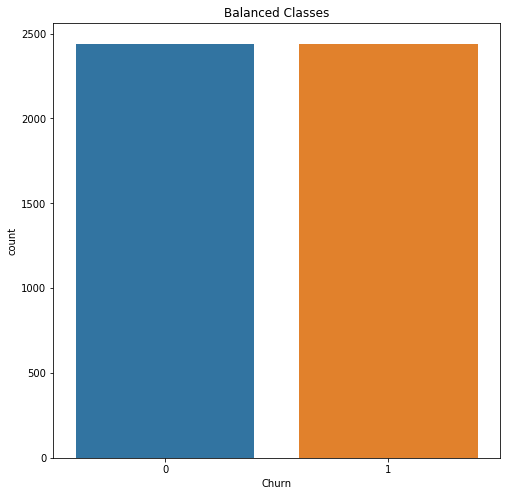

In [70]:
plt.figure(figsize=(8, 8))
sns.countplot('Churn', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

**lets build logistic regression on newly created dataset by undersampling**

In [71]:
# Putting feature variable to X_un
X_un = normalized_df.drop(['Churn','mobile_number'],axis=1)

# Putting response variable to y_un
y_un = normalized_df['Churn']

In [72]:
#feature standardisation
scaler = StandardScaler()
X_un_scaled = scaler.fit_transform(X_un)
X_un_scaled = pd.DataFrame(X_un, columns=X_un.columns)

In [73]:
#utting data into train and test set
X_un_train, X_un_test, y_un_train, y_un_test = train_test_split(X_un_scaled,y_un, train_size=0.7,test_size=0.3,random_state=100)

In [74]:
#build logistic regression
logr_underSapmling = LogisticRegression()
logr_underSapmling.fit(X_un_train,y_un_train)
y_pred_underSapmling =logr_underSapmling.predict(X_un_test)

C:\Users\Aniket-PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aniket-PC\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [75]:
#check confusion matrix
conf_underSapmling = metrics.confusion_matrix(y_un_test,y_pred_underSapmling)
print(conf_underSapmling)

[[601 126]
 [120 618]]


In [76]:
# Model Evaluation
sensitivity = conf_underSapmling[1,1]/(conf_underSapmling[1,0]+conf_underSapmling[1,1])
specificity =  conf_underSapmling[0,0]/(conf_underSapmling[0,1]+conf_underSapmling[0,0])
print("Accuracy : {}".format(metrics.accuracy_score(y_un_test,y_pred_underSapmling.round())))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

Accuracy : 0.8320819112627986
Sensitivity:  0.8373983739837398
Specificity:  0.8266850068775791


## Synthetic Minority Over-sampling Technique

In [77]:
#OverSampling Technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(kind = "regular")

In [78]:
X_os, y_os = smote.fit_sample(X_train, y_train)

In [79]:
#Check rows and columns of new dataset
X_os.shape

(38618, 98)

In [80]:
y_os.shape

(38618,)

In [81]:
#build logistic regression over  SMOTE genrated dataset
logr = LogisticRegression()
logr.fit(X_os,y_os)

C:\Users\Aniket-PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aniket-PC\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
#predict model
y_pred_oversampling = logr.predict(X_test)

In [83]:
#Evalute model
confusion_oversampling = metrics.confusion_matrix(y_test,y_pred_oversampling )
print(confusion_oversampling)

[[6934 1317]
 [ 130  620]]


In [84]:
sensitivity = confusion_oversampling[1,1]/(confusion_oversampling[1,0]+confusion_oversampling[1,1])
specificity =  confusion_oversampling[0,0]/(confusion_oversampling[0,1]+confusion_oversampling[0,0])
print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_pred_oversampling .round())))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

Accuracy : 0.8392400844350628
Sensitivity:  0.8266666666666667
Specificity:  0.8403829838807417


In [130]:
#Check correlation between features
corrmat = np.corrcoef(X_os.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

we can see features are highly correlated, to deal with collinearity issue and reduce dimension lets work on PCA

## Reduce the number of variables using PCA.

In [85]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=101)

In [86]:
#Doing the PCA on the train data
pca.fit(X_os)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=101,
    svd_solver='randomized', tol=0.0, whiten=False)

In [87]:
pca.components_

array([[ 9.94317721e-17, -2.22044605e-16,  0.00000000e+00, ...,
         6.01310867e-04, -3.94243053e-05,  6.21781371e-06],
       [-1.02323129e-17,  1.66533454e-16, -2.22044605e-16, ...,
         8.82504059e-04,  1.01858316e-04,  1.41821330e-04],
       [ 7.60877726e-19, -1.55691432e-16,  0.00000000e+00, ...,
         5.42255323e-03, -7.41300543e-05,  5.41441779e-04],
       ...,
       [ 0.00000000e+00, -9.27816979e-02, -2.29403949e-01, ...,
         1.44198889e-16, -1.46202630e-15,  1.12648606e-16],
       [ 0.00000000e+00,  7.13317726e-15, -5.80689609e-15, ...,
        -4.01245057e-18, -5.58336380e-17, -4.00980818e-18],
       [ 9.99959599e-01,  1.06098743e-05, -5.71227846e-06, ...,
        -8.08793837e-16,  4.63700181e-14,  1.48869225e-14]])

In [88]:
# let's check the features with top PCA components
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,9.943177e-17,-1.023231e-17,loc_og_t2o_mou
1,-2.220446e-16,1.665335e-16,std_og_t2o_mou
2,0.000000e+00,-2.220446e-16,loc_ic_t2o_mou
3,3.108658e-02,2.257158e-01,actionPhase_arpu
4,-3.971101e-02,1.711098e-01,actionPhase_onnet_mou


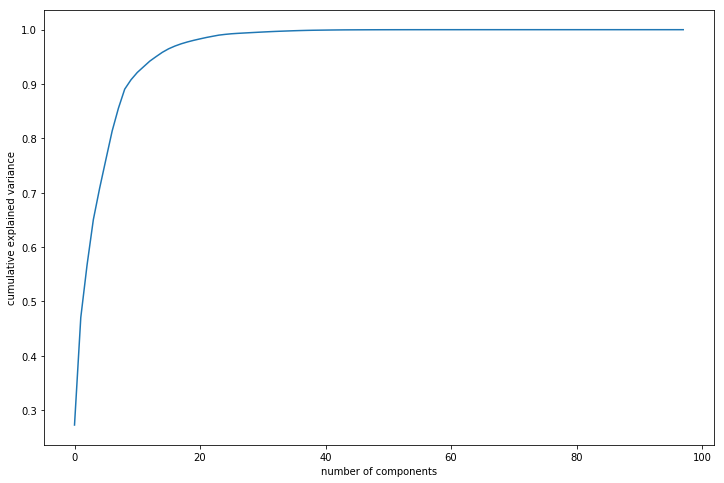

In [89]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [90]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [91]:
df_train_pca = pca_final.fit_transform(X_os)

df_train_pca.shape

(38618, 60)

In [92]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 60)

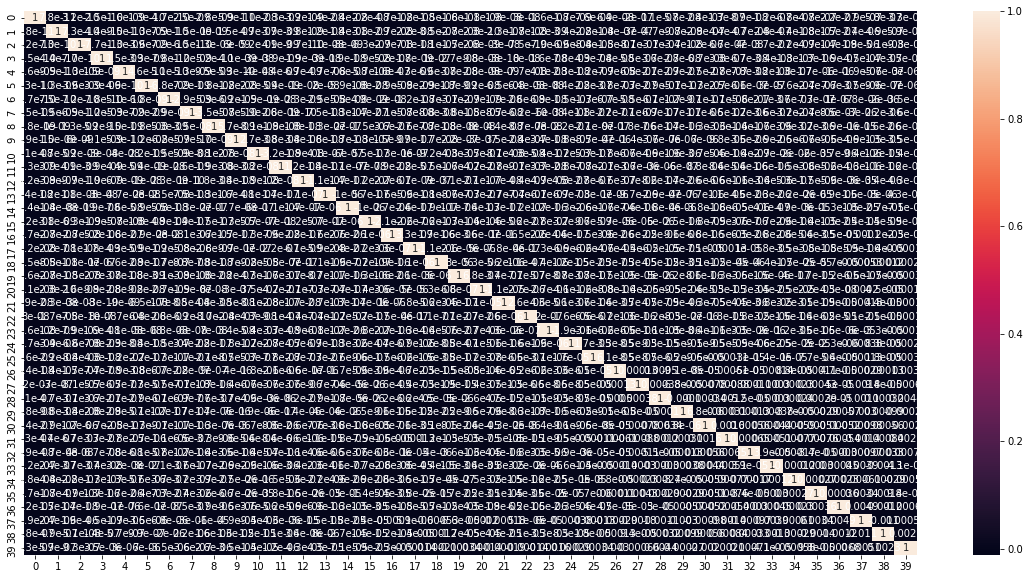

In [105]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [93]:
#lets build logistic regression model on PCA genrated set
log_pca = LogisticRegression()
log_pca.fit(df_train_pca, y_os)

C:\Users\Aniket-PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
#make prediction on test data 
y_pred_pca = log_pca.predict(df_test_pca)

In [95]:
confusion_pca = metrics.confusion_matrix(y_test,y_pred_pca )
print(confusion_pca)
sensitivity = confusion_pca[1,1]/(confusion_pca[1,0]+confusion_pca[1,1])
specificity =  confusion_pca[0,0]/(confusion_pca[0,1]+confusion_pca[0,0])
print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_pred_pca)))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

[[6968 1283]
 [ 132  618]]
Accuracy : 0.8427952449727808
Sensitivity:  0.824
Specificity:  0.8445036965216337


**We can see we got a very similar result**

## AdaBoost Algorithm

In [96]:
#import liabraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [97]:
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# fit the shallow decision tree 
shallow_tree.fit(X_os, y_os)

# test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.8105766025997111

In [98]:
# adaboost with the tree as base estimator

estimators = list(range(40, 200, 10))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_os, y_os)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

In [99]:
#check score
abc_scores

[0.9284523941784246,
 0.9292300855460505,
 0.9306743695144983,
 0.9315631596489279,
 0.9323408510165537,
 0.9333407399177869,
 0.9321186534829463,
 0.9338962337518053,
 0.9347850238862349,
 0.9338962337518053,
 0.9341184312854127,
 0.9341184312854127,
 0.9343406288190201,
 0.9350072214198423,
 0.935118320186646,
 0.9352294189534496]

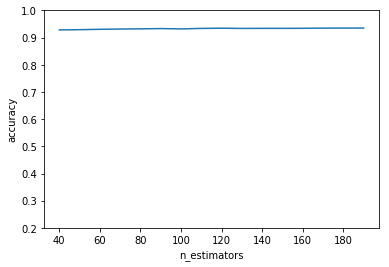

In [114]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.200, 1])
plt.show()

In [115]:
#correct n_estimators currently its wrong
ABC = AdaBoostClassifier(n_estimators=125,base_estimator=shallow_tree)

In [116]:
ABC.fit(X_os, y_os)
y_pred = ABC.predict(X_test)

In [117]:
#evalute metrix
confusion = metrics.confusion_matrix(y_test,y_pred )
print(confusion)
sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
specificity =  confusion[0,0]/(confusion[0,1]+confusion[0,0])
print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

[[8010  241]
 [ 347  403]]
Accuracy : 0.9346739251194311
Sensitivity:  0.5373333333333333
Specificity:  0.9707914192219125


## Gradient Boosting Algorithm

In [118]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [119]:
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [120]:
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [ ]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_os, y_os)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 19.2min finished


In [157]:
grid_search_GBC.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [158]:
# run gradient boosting with optimum parameters
GBC = GradientBoostingClassifier(learning_rate=0.1,subsample=0.9)

# fit and predict
GBC.fit(X_os, y_os)
y_pred_GBC =  GBC.predict(X_test)

In [159]:
confusion = metrics.confusion_matrix(y_test,y_pred_GBC )
print(confusion)
sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
specificity =  confusion[0,0]/(confusion[0,1]+confusion[0,0])
print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_pred_GBC)))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

[[646  81]
 [108 630]]
Accuracy : 0.8709897610921502
Sensitivity:  0.8536585365853658
Specificity:  0.8885832187070152


## Support vector machine (SVM)

In [165]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [161]:
# using rbf kernel, C=1, default value of gamma
model = SVC(C = 1, kernel='rbf')
model.fit(X_os, y_os)
y_pred_svc = model.predict(X_test)

C:\Users\Aniket-PC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [162]:
#Evaluate Model
confusion = metrics.confusion_matrix(y_test,y_pred_svc)
print(confusion)
sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
specificity =  confusion[0,0]/(confusion[0,1]+confusion[0,0])
print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_pred_svc)))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

[[727   0]
 [738   0]]
Sensitivity:  0.0
Specificity:  1.0


we can see the SVM is worked poor, to get better result lets tun the hyperparameters

In [166]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_os, y_os)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  9.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [167]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.5011668611435239 corresponding to hyperparameters {'C': 10, 'gamma': 0.0001}


In [169]:
# specify optimal hyperparameters
best_params = {"C":10 , "gamma":0.0001 , "kernel":"rbf"}

# build model with optimal  hyperparameters
model = SVC(C=10, gamma=0.0001, kernel="rbf")

model.fit(X_os, y_os)
y_pred_svc_tun = model.predict(X_test)

In [170]:
#Modle evaluation
confusion = metrics.confusion_matrix(y_test,y_pred_svc_tun )
print(confusion)
sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
specificity =  confusion[0,0]/(confusion[0,1]+confusion[0,0])
print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_pred_svc_tun)))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

[[725   2]
 [695  43]]
Accuracy : 0.5242320819112628
Sensitivity:  0.058265582655826556
Specificity:  0.9972489683631361


We can see from above evaluation metrics even after tuning the  hyperparameters we are not getting better result using SVM

## Decision tree

In [171]:
#Decision tree 
from sklearn.tree import DecisionTreeClassifier

In [172]:
#Build DecisionTree
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_os, y_os)
y_pred_default = dt_default.predict(X_test)

In [173]:
#Evalute metrix
confusion = metrics.confusion_matrix(y_test,y_pred_default)
print(confusion)
sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
specificity =  confusion[0,0]/(confusion[0,1]+confusion[0,0])
print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_pred_default)))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

[[598 129]
 [141 597]]
Accuracy : 0.8156996587030717
Sensitivity:  0.8089430894308943
Specificity:  0.8225584594222833


Decision tree is giving good result but to get better result lets tun the hyperparameters

In [176]:
#Lets tun the hyerparameter
parameter_grid = {'max_depth': list(range(1, 20, 1)),
                  'max_features': list(range(10, 20, 2)),
                  'min_samples_leaf': list(range(10, 100, 5)),
                  'min_samples_split': list(range(20, 50, 5)),
                  'max_features': list(range(10, 60, 5)),
                  'random_state': [43]}


grid_search = GridSearchCV(
         DecisionTreeClassifier(),
         param_grid=parameter_grid,
         scoring= 'accuracy')

# Fit the grid search to the data
grid_search.fit(X_os, y_os)

C:\Users\Aniket-PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='wa...one,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 

In [177]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8439323220536756
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=45, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=43, splitter='best')


In [178]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion ='gini' , 
                                   max_features = 45,
                                  random_state = 43,
                                  max_depth=6, 
                                  min_samples_leaf=25,
                                  min_samples_split=20)


                                
clf_gini.fit(X_os, y_os)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=45, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=43, splitter='best')

In [179]:
y_pred_dc = clf_gini.predict(X_test)
# accuracy score
clf_gini.score(X_test,y_test)

0.8136518771331058

In [180]:
#evalute metrix
confusion = metrics.confusion_matrix(y_test,y_pred_dc)
print(confusion)
sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
specificity =  confusion[0,0]/(confusion[0,1]+confusion[0,0])
print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_pred_dc)))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

[[601 126]
 [147 591]]
Accuracy : 0.8136518771331058
Sensitivity:  0.8008130081300813
Specificity:  0.8266850068775791


## RandomForest

In [182]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=6,
                             min_samples_leaf=25, 
                             min_samples_split=20,
                             max_features=45,
                             n_estimators=20)
  
                                 
rfc.fit(X_os, y_os)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=45, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [183]:
#make prediction
y_pred_rfc = rfc.predict(X_test)

In [184]:
#evalute metrix
confusion = metrics.confusion_matrix(y_test,y_pred_rfc)
print(confusion)
sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
specificity =  confusion[0,0]/(confusion[0,1]+confusion[0,0])
print("Accuracy : {}".format(metrics.accuracy_score(y_test,y_pred_rfc)))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

[[630  97]
 [128 610]]
Accuracy : 0.8464163822525598
Sensitivity:  0.8265582655826558
Specificity:  0.8665749656121046


## Result of Models

## 1)Logistic Regression
       Accuracy : 0.8327645051194539
       Sensitivity:  0.8214634146341463
       Specificity:  0.8439339752407153

## 2)AdaBoost Model
      Accuracy : 0.8279863481228669
      Sensitivity:  0.8184281842818428
      Specificity:  0.8376891334250344

## 3) GradientBoost Model
       Accuracy : 0.8709897610921502
       Sensitivity:  0.8536585365853658
       Specificity:  0.8885832187070152

## 4) SVM
       Accuracy : 0.5242320819112628
       Sensitivity:  0.058265582655826556
       Specificity:  0.9972489683631361
       
## 5)DecisionTree
      Accuracy : 0.8136518771331058
      Sensitivity:  0.8008130081300813
      Specificity:  0.8266850068775791
    
## 6)RandomForest
      Accuracy : 0.8464163822525598
      Sensitivity:  0.8265582655826558
      Specificity:  0.8665749656121046
      
**GradientBoost Model is the best model among all. It perform well**

### For selecting feature run RandomForest once again

In [190]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=6,
                             min_samples_leaf=25, 
                             min_samples_split=20,
                             max_features=45,
                             n_estimators=20)
  
                                 
rfc.fit(X_os, y_os)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=45, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [191]:
y_pred_rfc = rfc.predict(X_test)

In [193]:
importance_of_feature= pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
importance_of_feature.head(10)

,importance
actionPhase_loc_ic_mou,0.252045
actionPhase_loc_ic_t2m_mou,0.172136
actionPhase_loc_ic_t2t_mou,0.078073
actionPhase_total_ic_mou,0.074123
actionPhase_roam_og_mou,0.068138
day_of_last_rech_8,0.058877
actionPhase_last_day_rch_amt,0.043627
actionPhase_roam_ic_mou,0.040247
actionPhase_total_rech_data_amt,0.039475
actionPhase_max_rech_data,0.026690


### Making prediction on Test data

In [206]:
probs_test= rfc.predict_proba(X_test)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, probs_test))

'0.92'

In [207]:
y_pred_df = pd.DataFrame(probs_test)
y_pred_df.head()

,0
0,0.619554
1,0.051933
2,0.941103
3,0.302046
4,0.055580


In [208]:
y_pred_new = y_pred_df.iloc[:,[0]]
y_pred_new.head()

,0
0,0.619554
1,0.051933
2,0.941103
3,0.302046
4,0.055580


In [209]:
# Lets convert the y_test to df
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
58694,0
50916,0
93754,1
9807,0
55114,0


In [210]:
# Remove index for both dataframes
y_pred_new.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [211]:
y_pred_new.head()

,0
0,0.619554
1,0.051933
2,0.941103
3,0.302046
4,0.055580


In [212]:
y_test_df.head()

,Churn
0,0
1,0
2,1
3,0
4,0


In [213]:
# Append y_test_df and y_pred_new
y_pred_new = pd.concat([y_test_df,y_pred_new],axis=1)

In [214]:
y_pred_new.head()

,Churn,0
0,0,0.619554
1,0,0.051933
2,1,0.941103
3,0,0.302046
4,0,0.055580


In [215]:
#Rearrange y_pred_new dataframe
y_pred_new= y_pred_new.rename(columns={ 0 : 'Churn_Prob'})
y_pred_new.head()

,Churn,Churn_Prob
0,0,0.619554
1,0,0.051933
2,1,0.941103
3,0,0.302046
4,0,0.055580


In [216]:
#Lets add new column 'predicted' as 1 if Churn_Prob>0.5 else 0
y_pred_new['predicted'] = y_pred_new.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [217]:
y_pred_new.head()

,Churn,Churn_Prob,predicted
0,0,0.619554,1
1,0,0.051933,0
2,1,0.941103,1
3,0,0.302046,0
4,0,0.055580,0


In [218]:
# Let's create columns with different probability cutoffs 
no = [float(x)/10 for x in range(10)]
for i in no:
    y_pred_new[i]= y_pred_new.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_new.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.619554,1,1,1,1,1,1,1,1,0,0,0
1,0,0.051933,0,1,0,0,0,0,0,0,0,0,0
2,1,0.941103,1,1,1,1,1,1,1,1,1,1,1
3,0,0.302046,0,1,1,1,1,0,0,0,0,0,0
4,0,0.055580,0,1,0,0,0,0,0,0,0,0,0


In [220]:
# Let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix( y_pred_new['Churn'], y_pred_new[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensi = cm[0,0]/(cm[0,0]+cm[0,1])
    speci = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.503754  0.000000  1.000000
0.1   0.1  0.714676  0.442916  0.982385
0.2   0.2  0.766553  0.559835  0.970190
0.3   0.3  0.815017  0.685007  0.943089
0.4   0.4  0.845051  0.792297  0.897019
0.5   0.5  0.840956  0.861073  0.821138
0.6   0.6  0.825939  0.903714  0.749322
0.7   0.7  0.804778  0.943604  0.668022
0.8   0.8  0.771331  0.960110  0.585366
0.9   0.9  0.737201  0.979367  0.498645


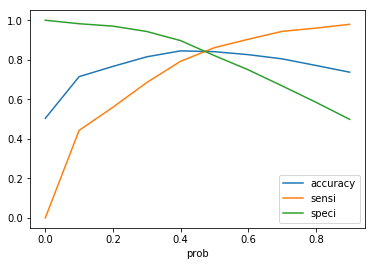

In [221]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [222]:
y_pred_new['final_predicted'] = y_pred_new.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

In [226]:
y_pred_new.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.619554,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.051933,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.941103,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.302046,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.055580,0,1,0,0,0,0,0,0,0,0,0,0


In [228]:
confusionF = metrics.confusion_matrix(y_pred_new['Churn'], y_pred_new['final_predicted'])
print(confusionF)
sensitivity = confusionF[1,1]/(confusionF[1,0]+confusionF[1,1])
specificity =  confusionF[0,0]/(confusionF[0,1]+confusionF[0,0])
print("Accuracy : {}".format(metrics.accuracy_score(y_pred_new['Churn'], y_pred_new['final_predicted'])))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)

[[322 405]
 [ 13 725]]
Accuracy : 0.7146757679180887
Sensitivity:  0.9823848238482384
Specificity:  0.44291609353507566


In [229]:
importance_of_feature= pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
importance_of_feature.head(10)

,importance
actionPhase_loc_ic_mou,0.252045
actionPhase_loc_ic_t2m_mou,0.172136
actionPhase_loc_ic_t2t_mou,0.078073
actionPhase_total_ic_mou,0.074123
actionPhase_roam_og_mou,0.068138
day_of_last_rech_8,0.058877
actionPhase_last_day_rch_amt,0.043627
actionPhase_roam_ic_mou,0.040247
actionPhase_total_rech_data_amt,0.039475
actionPhase_max_rech_data,0.026690


## Recommend strategies to manage customer churn

1) **Roaming charges**: Apply less or make roaming free for incoming as well as outgoing calls.

2) **Recharge Data**: Reduce data charges and give more data in less amount

3) **Incoming Calls**: Check the users from urban areas who are just using SIM for incoming calls,  understand theire concerns.

4) **Offers**: Give more offers to customer who has been using services from long time.

